# Oasis Infobyte (Data Science Internship)
## Task 2
## Unemployment Analysis in India
### By Saugata Panja

## 1. Loading dataset

In [2]:
# importing pandas to read the dataset
import pandas as pd
#Reading the Iris dataset through pandas
data=pd.read_csv(r"C:\Users\sauga\Desktop\Datasets\Unemployment_Rate_upto_11_2020.csv")
df=pd.DataFrame(data)

#Printing the dataset
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


## 2. Dataset analysis

In [3]:
# Checking shape of dataset
print(df.shape)


(267, 9)


In [4]:
# Printing coulums' name
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [5]:
# Description of the dataset
print(df.describe())

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       267.000000        2.670000e+02   
mean                         12.236929        1.396211e+07   
std                          10.803283        1.336632e+07   
min                           0.500000        1.175420e+05   
25%                           4.845000        2.838930e+06   
50%                           9.650000        9.732417e+06   
75%                          16.755000        2.187869e+07   
max                          75.850000        5.943376e+07   

       Estimated Labour Participation Rate (%)   longitude    latitude  
count                               267.000000  267.000000  267.000000  
mean                                 41.681573   22.826048   80.532425  
std                                   7.845419    6.270731    5.831738  
min                                  16.770000   10.850500   71.192400  
25%                                  37.265000   18.112400   76.085600  
50%

In [6]:
# Info about the whole dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [7]:
# Checking for null values
print(df.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64


There are missing values in the dataset.

In [8]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Region, Date, Frequency, Estimated Unemployment Rate (%), Estimated Employed, Estimated Labour Participation Rate (%), Region.1, longitude, latitude]
Index: []


There are no duplicate rows either.

In [9]:
print(df['Region'].unique())
print(df['Region'].nunique())

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
27


So, There are total 27 unique states in this dataset.

## 3. Data Visualization

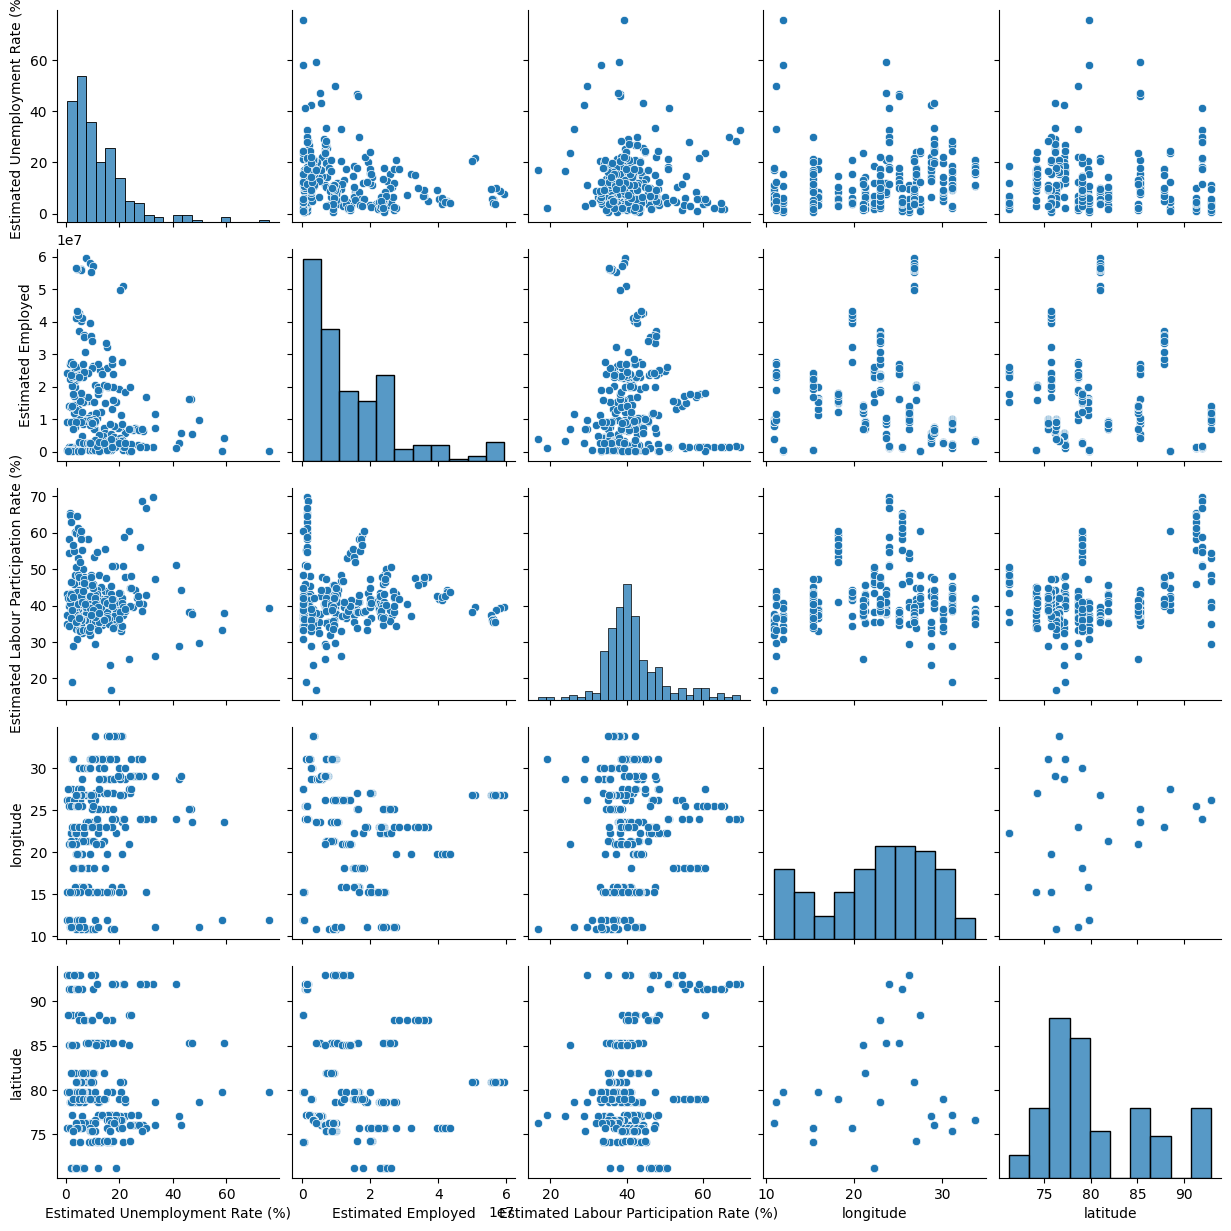

In [20]:
import seaborn as sns
sns.pairplot(df)

C:\Users\sauga\AppData\Local\Temp\ipykernel_15884\3799873215.py:4: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


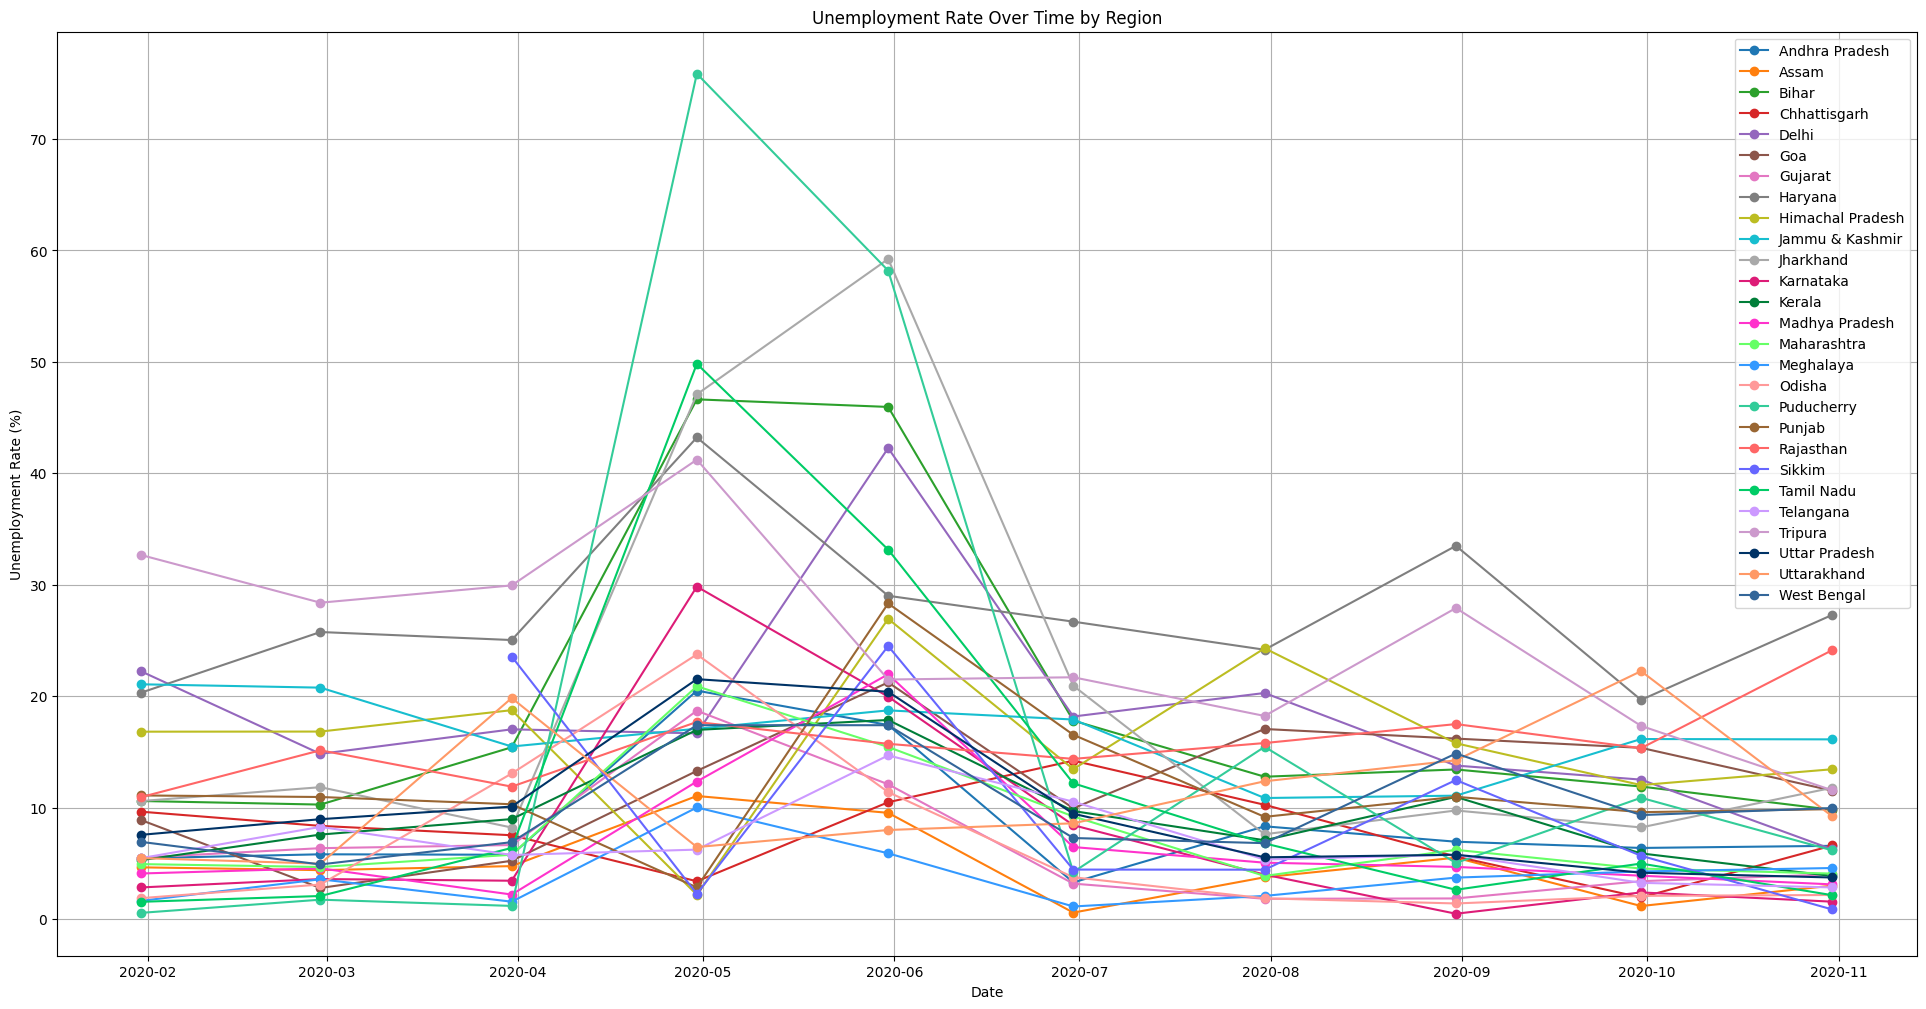

In [10]:
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get a list of unique regions in the dataset
regions = df['Region'].unique()

# Create a separate plot for each region
plt.figure(figsize=(24, 12))  # Create a single figure to hold all subplots

# Define a list of 27 distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#a9a9a9', '#dd1c77',
          '#017e39', '#ff33cc', '#66ff66', '#3399ff', '#ff9999', '#33cc99',
          '#996633', '#ff6666', '#6666ff', '#00cc66', '#cc99ff', '#cc99cc',
          '#003366', '#ff9966', '#336699']

for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]

    # Plot data for the region using a line plot with a unique color
    plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], label=region, marker='o', color=colors[i])

plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)

# Add a legend to distinguish regions
plt.legend()

# Display all the plots at once
plt.show()

In [11]:
# Find the state with the highest employment rate
highest_rate_state = df[df['Estimated Unemployment Rate (%)'] == df['Estimated Unemployment Rate (%)'].max()]['Region'].values[0]

# Find the state with the lowest employment rate
lowest_rate_state = df[df['Estimated Unemployment Rate (%)'] == df['Estimated Unemployment Rate (%)'].min()]['Region'].values[0]

print(f"State with the highest unemployment rate: {highest_rate_state}")
print(f"State with the lowest unemployment rate: {lowest_rate_state}")

State with the highest unemployment rate: Puducherry
State with the lowest unemployment rate: Karnataka


In [12]:
average_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
print(average_unemployment)

Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name: Estimated Unemployment Rate (%), dtype: float64


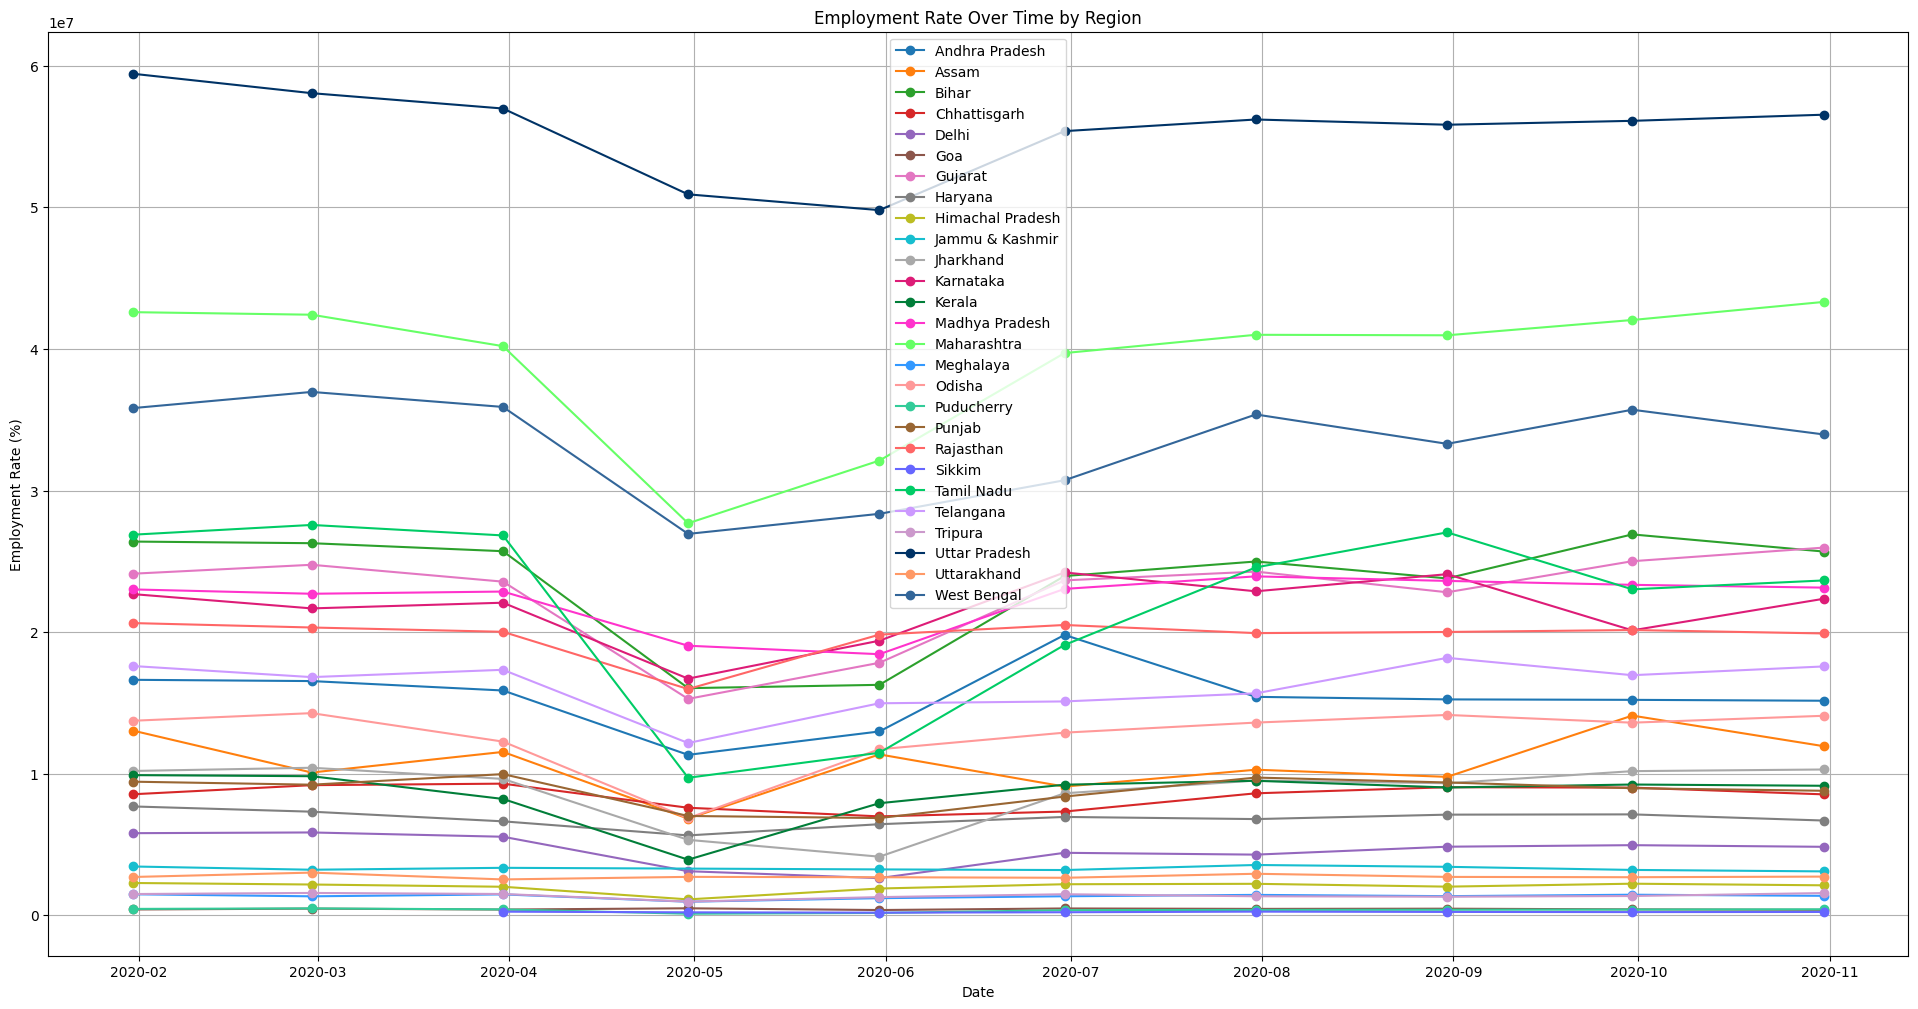

In [13]:
# Create a separate plot for each region
plt.figure(figsize=(24, 12))  # Create a single figure to hold all subplots

# Define a list of 27 distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#a9a9a9', '#dd1c77',
          '#017e39', '#ff33cc', '#66ff66', '#3399ff', '#ff9999', '#33cc99',
          '#996633', '#ff6666', '#6666ff', '#00cc66', '#cc99ff', '#cc99cc',
          '#003366', '#ff9966', '#336699']

for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]

    # Plot data for the region using a line plot with a unique color
    plt.plot(region_data['Date'], region_data['Estimated Employed'], label=region, marker='o', color=colors[i])

plt.title('Employment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Employment Rate (%)')
plt.grid(True)

# Add a legend to distinguish regions
plt.legend()

# Display all the plots at once
plt.show()

In [14]:
# Find the state with the highest employment rate
highest_rate_state = df[df['Estimated Employed'] == df['Estimated Employed'].max()]['Region'].values[0]

# Find the state with the lowest employment rate
lowest_rate_state = df[df['Estimated Employed'] == df['Estimated Employed'].min()]['Region'].values[0]

print(f"State with the highest employment rate: {highest_rate_state}")
print(f"State with the lowest employment rate: {lowest_rate_state}")

State with the highest employment rate: Uttar Pradesh
State with the lowest employment rate: Puducherry


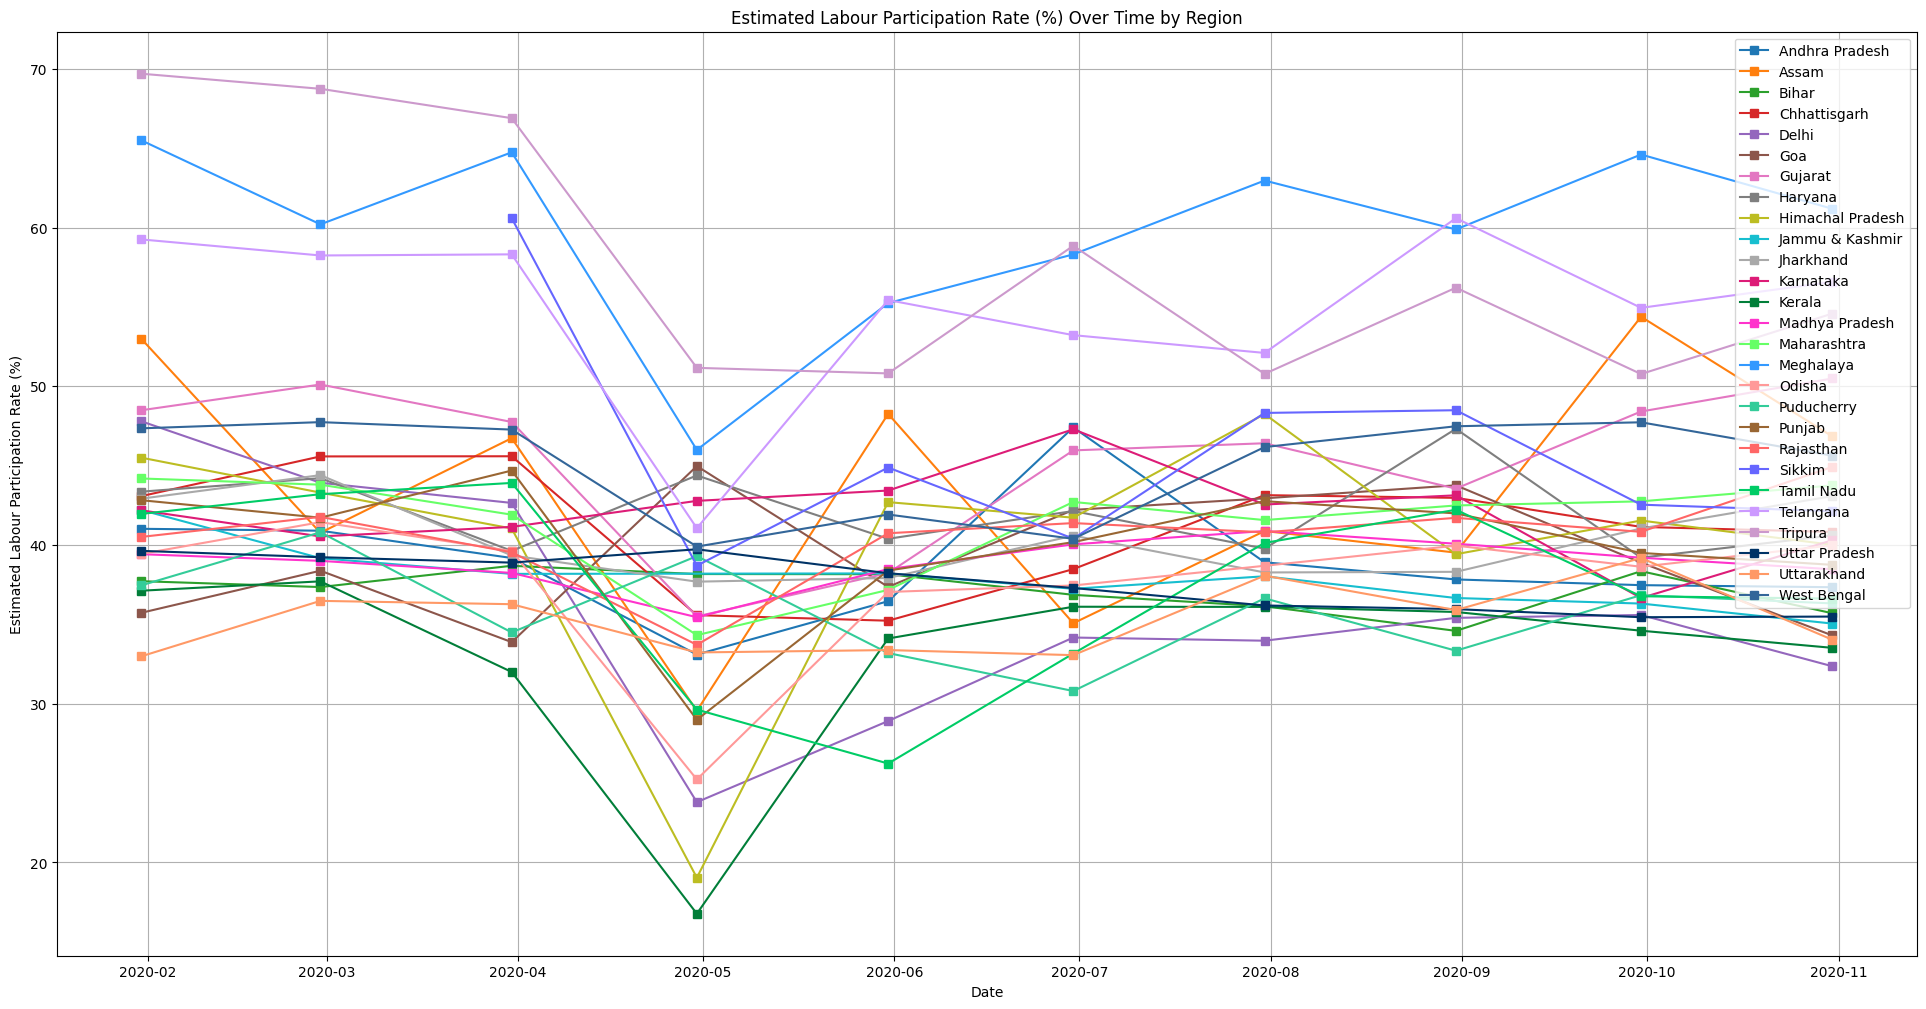

In [15]:
# Create a separate plot for each region
plt.figure(figsize=(24, 12))  # Create a single figure to hold all subplots

# Define a list of 27 distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#a9a9a9', '#dd1c77',
          '#017e39', '#ff33cc', '#66ff66', '#3399ff', '#ff9999', '#33cc99',
          '#996633', '#ff6666', '#6666ff', '#00cc66', '#cc99ff', '#cc99cc',
          '#003366', '#ff9966', '#336699']

for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]

    # Plot data for the region using a line plot with a unique color
    plt.plot(region_data['Date'], region_data['Estimated Labour Participation Rate (%)'], label=region, marker='s', color=colors[i])

plt.title('Estimated Labour Participation Rate (%) Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.grid(True)

# Add a legend to distinguish regions
plt.legend()

# Display all the plots at once
plt.show()

In [16]:
# Find the state with the highest employment rate
highest_rate_state = df[df['Estimated Labour Participation Rate (%)'] == df['Estimated Labour Participation Rate (%)'].max()]['Region'].values[0]

# Find the state with the lowest employment rate
lowest_rate_state = df[df['Estimated Labour Participation Rate (%)'] == df['Estimated Labour Participation Rate (%)'].min()]['Region'].values[0]

print(f"State with the highest Estimated Labour Participation rate: {highest_rate_state}")
print(f"State with the lowest Estimated Labour Participation rate: {lowest_rate_state}")

State with the highest Estimated Labour Participation rate: Tripura
State with the lowest Estimated Labour Participation rate: Kerala


In [17]:
df['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

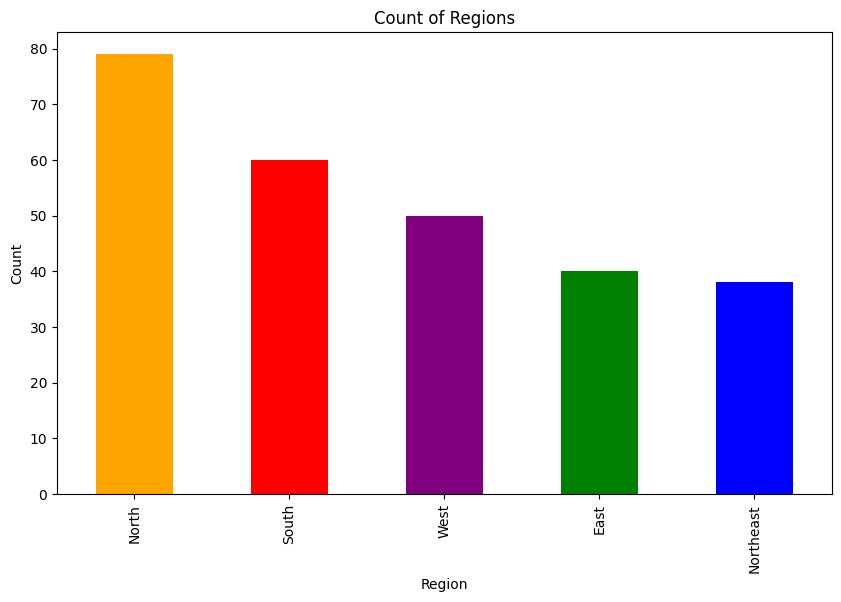

In [18]:
# Count the occurrences of each unique value in 'Region.1'
value_counts = df['Region.1'].value_counts()

# Define a color map for the regions
colors = {
    'South': 'red',
    'Northeast': 'blue',
    'East': 'green',
    'West': 'purple',
    'North': 'orange'
}

# Create a bar chart
value_counts.plot(kind='bar', figsize=(10, 6), color=[colors.get(region, 'gray') for region in value_counts.index])

# Set axis labels and chart title
plt.title('Count of Regions')
plt.xlabel('Region')
plt.ylabel('Count')

# Show the plot
plt.show()